<a href="https://colab.research.google.com/github/robertoricci/Analise-Financeira/blob/main/Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para investimentos - Intro

'''
# Aula através do Youtube, pelo canal "Ricos pelo acaso". https://www.youtube.com/watch?v=7GGrt3-rRH8. Tenho uma paixão danada pelo mercado financeiro, já tendo atuado como daytrade inclusive. Amo tudo o que se refere a este universo, tenho fascínio. 
#Aqui pretendo criar um documento, contendo várias vertentes de análises de ações, análises preditivas e outros. Irei separar por tópicos como: "Análise de correlação entre ações", "Análise Fundamentalista e seus critérios", "Dados econômicos, predições e possíveis impactos em ações de nicho "x"." Coisas deste tipo em geral. Deixarei este arquivo no meu github e se tiverem ideias que possam agregar a este pequeno projeto pessoal, serei extremamente grato :D.
'''

# Obtendo cotações do Yahoo Finance

In [ ]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import random

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


# Obtendo os dados

In [ ]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [ ]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-15,92780.000000,93112.000000,90148.000000,92376.000000,92376.000000,13317500
2020-06-16,92387.000000,95216.000000,92387.000000,93531.000000,93531.000000,12034200
2020-06-17,93531.000000,96611.000000,93531.000000,95547.000000,95547.000000,11134700
2020-06-18,95547.000000,97110.000000,94698.000000,96125.000000,96125.000000,10008500
2020-06-19,96137.890625,97540.328125,95874.296875,96411.351562,96411.351562,0


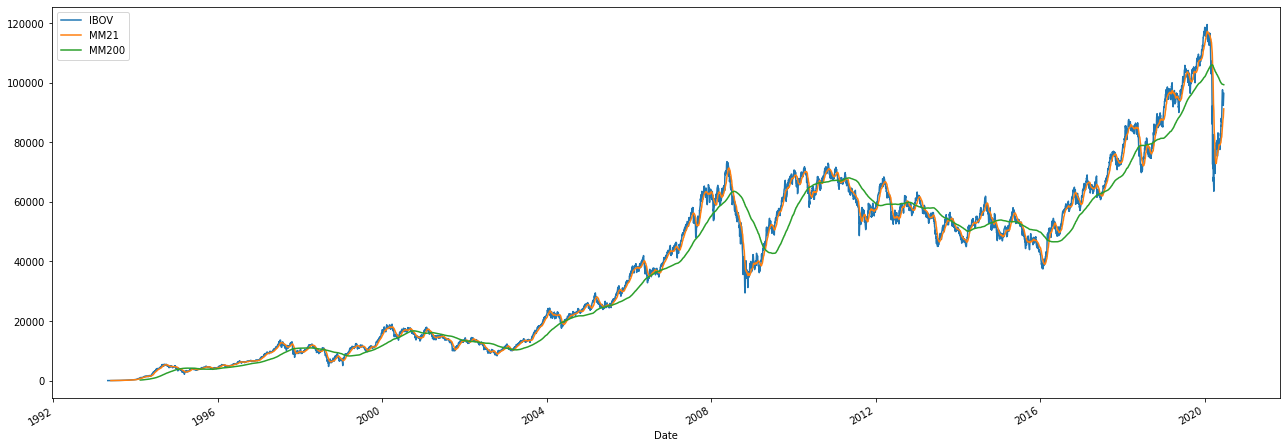

In [ ]:
#Inserindo Médias Móveis, porém, em todo o período de dados do IBOV.
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

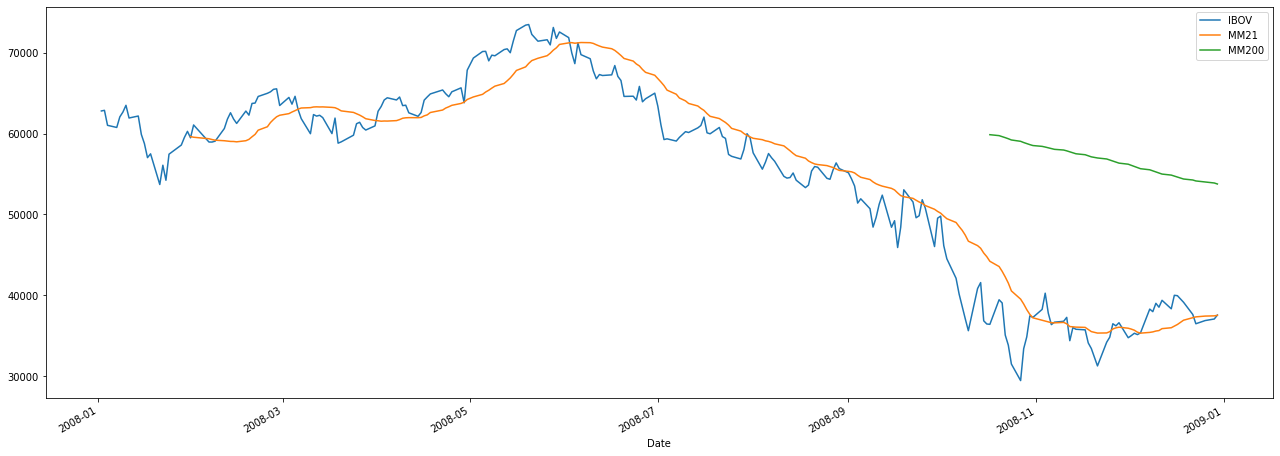

In [ ]:
#Aqui, filtro por ano
#Aqui você pode filtrar por ano, mês, dia, períodos, conforme seu interesse, 
# basta alterar os dados da primeira variável
a2008 = ibov[(ibov.index.year == 2008)]
a2008["Close"].plot(figsize=(22,8), label="IBOV")
a2008["Close"].rolling(21).mean().plot(label="MM21")
a2008["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

Outro

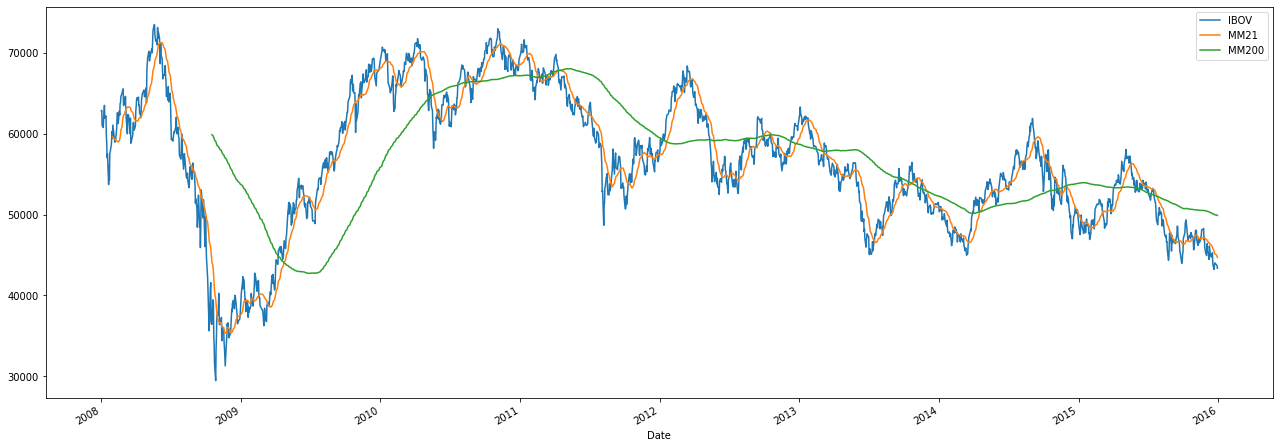

In [ ]:
#Aqui filtro por período
periodo = ibov[(ibov.index.year >= 2008) & (ibov.index.year <= 2015)]
periodo["Close"].plot(figsize=(22,8), label="IBOV")
periodo["Close"].rolling(21).mean().plot(label="MM21")
periodo["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [ ]:
#Filtro por período específico (bom para marcar fundos de inv, atuações periódicas de players,
#sazonalidades e outros.
#Filtrando o período por mês, neste caso dezembro.
periodo = ibov[ibov.index.month == 12]
periodo.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-28,85469.0,88044.0,85469.0,87887.0,87887.0,3649100
2019-12-02,108246.0,109279.0,108245.0,109061.0,109061.0,4708000
2019-12-03,108931.0,109198.0,108190.0,109005.0,109005.0,5223100
2019-12-04,108962.0,110301.0,108962.0,110301.0,110301.0,4889500
2019-12-05,110297.0,111073.0,110008.0,110622.0,110622.0,4399100
2019-12-06,110623.0,111430.0,110623.0,111126.0,111126.0,4968100
2019-12-09,111125.0,111453.0,110870.0,110977.0,110977.0,4991500
2019-12-10,110973.0,111184.0,110133.0,110672.0,110672.0,4758800
2019-12-11,110672.0,111227.0,110530.0,110964.0,110964.0,5146100


In [ ]:
periodo = ibov[ibov.index.day == 1]
periodo.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,62711.0,63293.0,62165.0,62289.0,62289.0,3370200
2017-08-01,65925.0,66606.0,65925.0,66516.0,66516.0,2762600
2017-09-01,70848.0,72217.0,70846.0,71923.0,71923.0,3880900
2017-11-01,74310.0,75199.0,73823.0,73824.0,73824.0,3668100
2017-12-01,71955.0,72472.0,71488.0,72264.0,72264.0,3003100
2018-02-01,84913.0,86028.0,84833.0,85495.0,85495.0,4085300
2018-03-01,85337.0,86260.0,84640.0,85378.0,85378.0,4341300
2018-06-01,76779.0,78169.0,75524.0,77240.0,77240.0,6044400
2018-08-01,79213.0,79731.0,78769.0,79302.0,79302.0,3227100


In [ ]:
#Também é possível, na solicitação, definir estes parâmetros
petr4 = web.get_data_yahoo('PETR4.SA', start='2010-01-01', end='2020-06-19')

[*********************100%***********************]  1 of 1 completed


In [ ]:
petr4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.950001,37.320000,36.820000,37.320000,31.196785,13303600.0
2010-01-05,37.380001,37.430000,36.799999,37.000000,30.929281,21396400.0
2010-01-06,36.799999,37.500000,36.799999,37.500000,31.347252,18720600.0
2010-01-07,37.270000,37.450001,37.070000,37.150002,31.054678,10964600.0
2010-01-08,37.160000,37.389999,36.860001,36.950001,30.887495,14624200.0
...,...,...,...,...,...,...
2020-06-12,20.620001,21.170000,20.100000,20.600000,20.600000,116746700.0
2020-06-15,19.809999,21.090000,19.540001,20.700001,20.700001,99931000.0
2020-06-16,21.559999,21.910000,21.170000,21.370001,21.370001,94510600.0


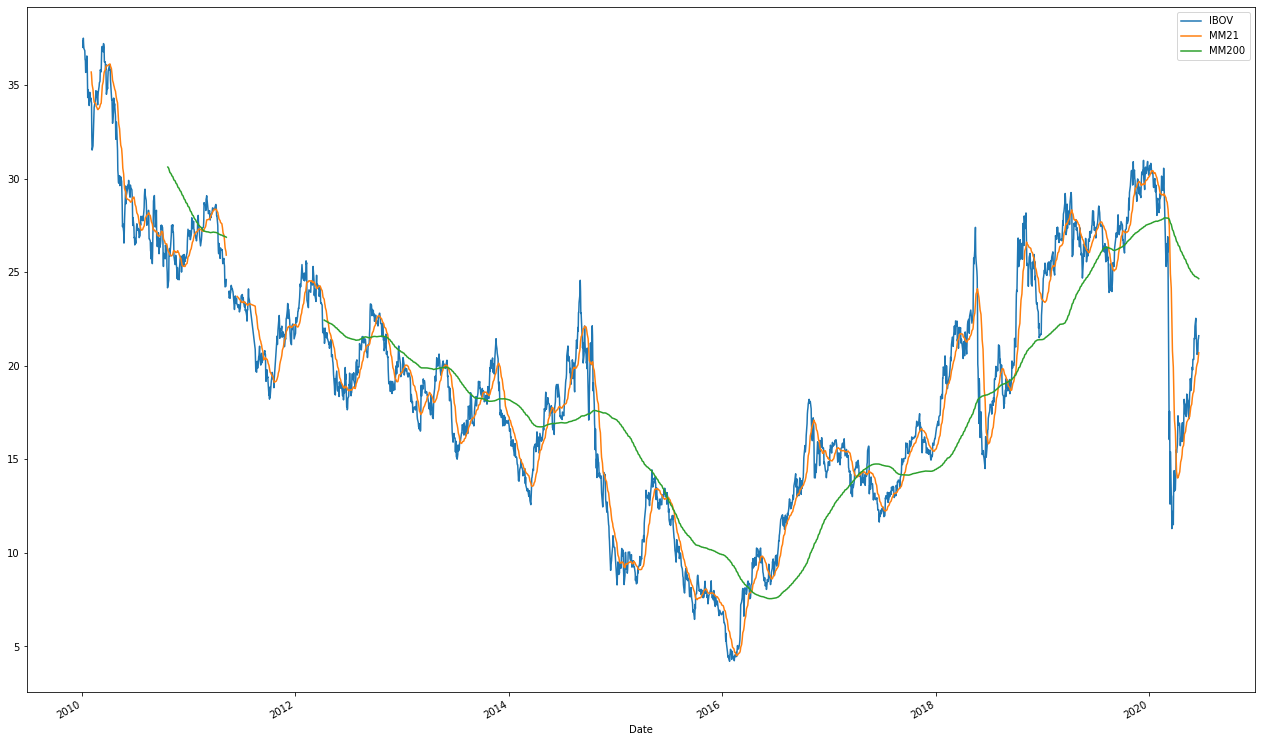

In [ ]:
#Aqui filtro por período
petr4 = petr4[(petr4.index.year >= 2010) & (petr4.index.year <= 2020)]
petr4["Close"].plot(figsize=(22,14), label="IBOV")
petr4["Close"].rolling(21).mean().plot(label="MM21")
petr4["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

# Obtendo e tratando dados

In [ ]:
tickers = ["^BVSP", "USDBRL=X"]
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira 

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.13250,NaN
2007-01-02,2.13100,45383.000000
2007-01-03,2.13450,44445.000000
2007-01-04,2.13900,44020.000000
2007-01-05,2.14700,42245.000000
...,...,...
2020-06-15,5.04780,92376.000000
2020-06-16,5.15321,93531.000000
2020-06-17,5.24360,95547.000000


In [ ]:
#Retirou os dados faltantes
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.13100,45383.000000
2007-01-03,2.13450,44445.000000
2007-01-04,2.13900,44020.000000
2007-01-05,2.14700,42245.000000
2007-01-08,2.14650,42830.000000
...,...,...
2020-06-15,5.04780,92376.000000
2020-06-16,5.15321,93531.000000
2020-06-17,5.24360,95547.000000


In [ ]:
#Alterando nome das colunas
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.13100,45383.000000
2007-01-03,2.13450,44445.000000
2007-01-04,2.13900,44020.000000
2007-01-05,2.14700,42245.000000
2007-01-08,2.14650,42830.000000
...,...,...
2020-06-15,5.04780,92376.000000
2020-06-16,5.15321,93531.000000
2020-06-17,5.24360,95547.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2540f102b0>,
      dtype=object)

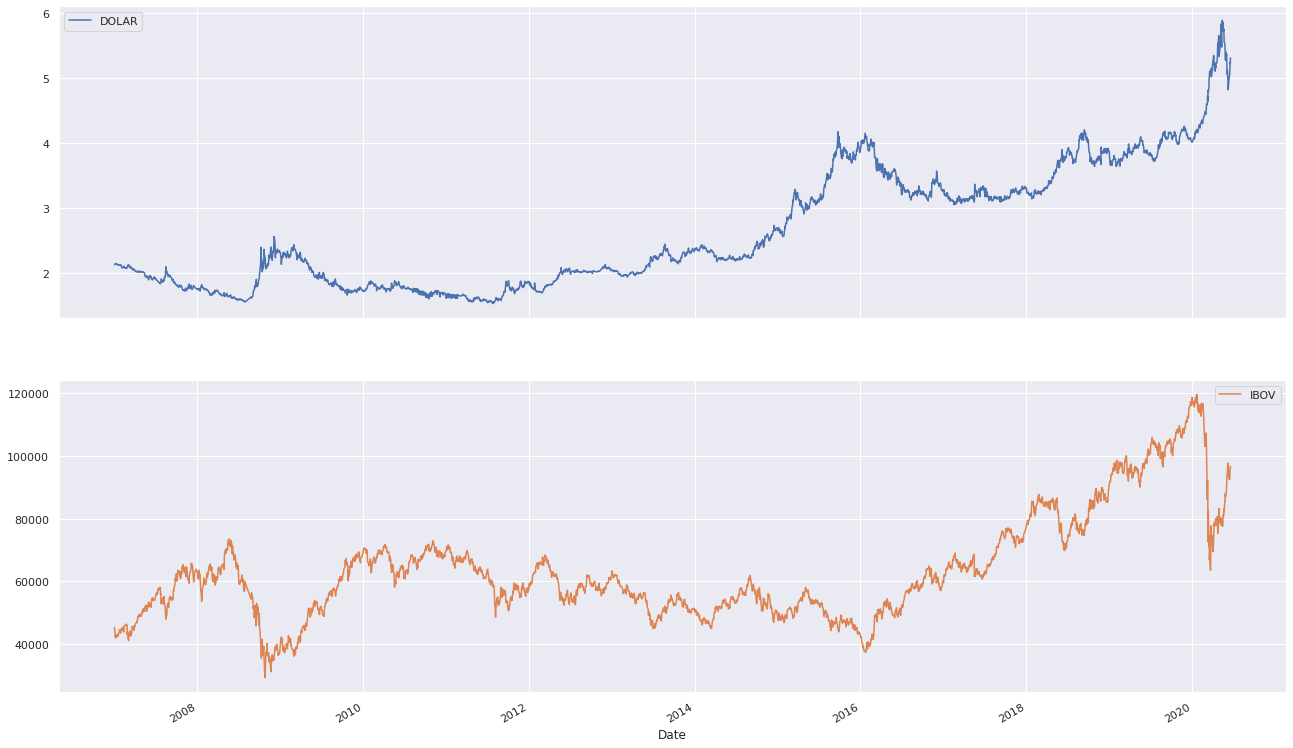

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize = (22,14))

# Correlações entre IBOV, DOL e IBOV Dolarizado.

In [ ]:
#CORRELAÇÃO ZICA!
carteira.corr()

,DOLAR,IBOV
DOLAR,1.000000,0.488973
IBOV,0.488973,1.000000


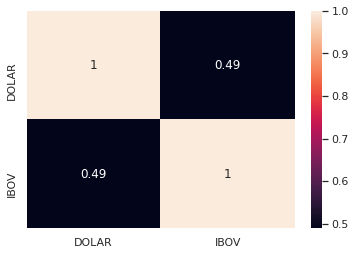

In [ ]:
sns.heatmap(carteira.corr(), annot=True)

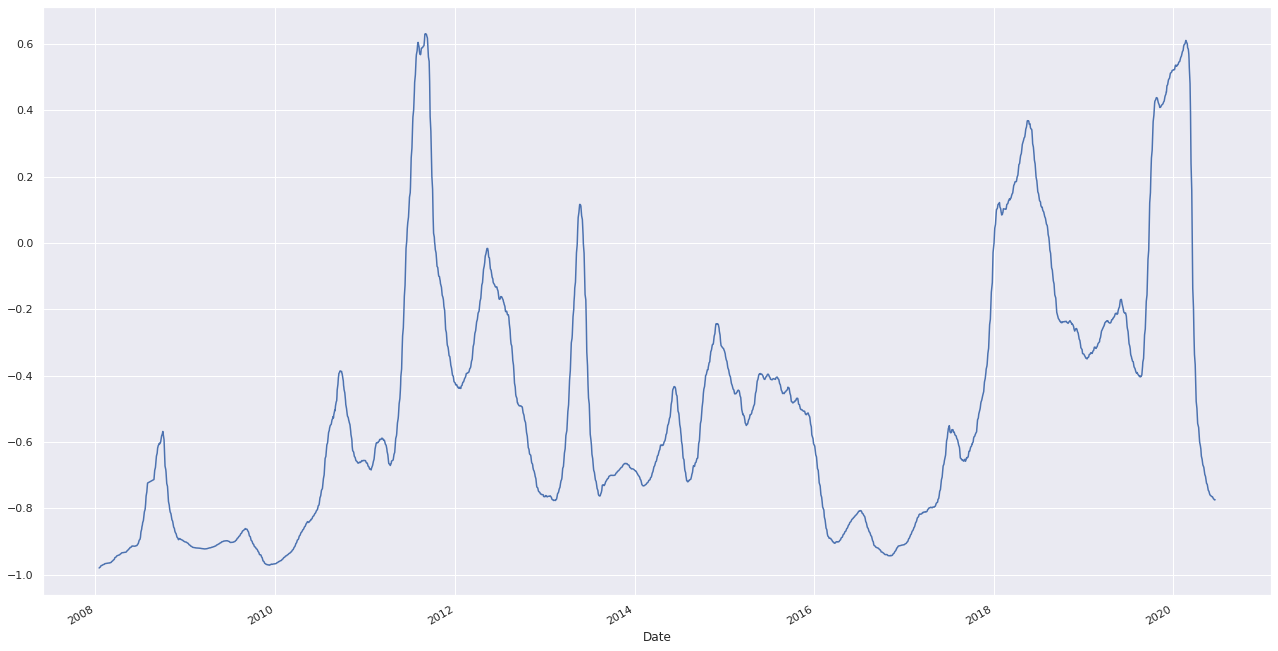

In [ ]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,12))

In [ ]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.13100,45383.000000,21296.573959
2007-01-03,2.13450,44445.000000,20822.206345
2007-01-04,2.13900,44020.000000,20579.710732
2007-01-05,2.14700,42245.000000,19676.291819
2007-01-08,2.14650,42830.000000,19953.411504
...,...,...,...
2020-06-15,5.04780,92376.000000,18300.249381
2020-06-16,5.15321,93531.000000,18150.045707
2020-06-17,5.24360,95547.000000,18221.641997


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f253df08390>,
      dtype=object)

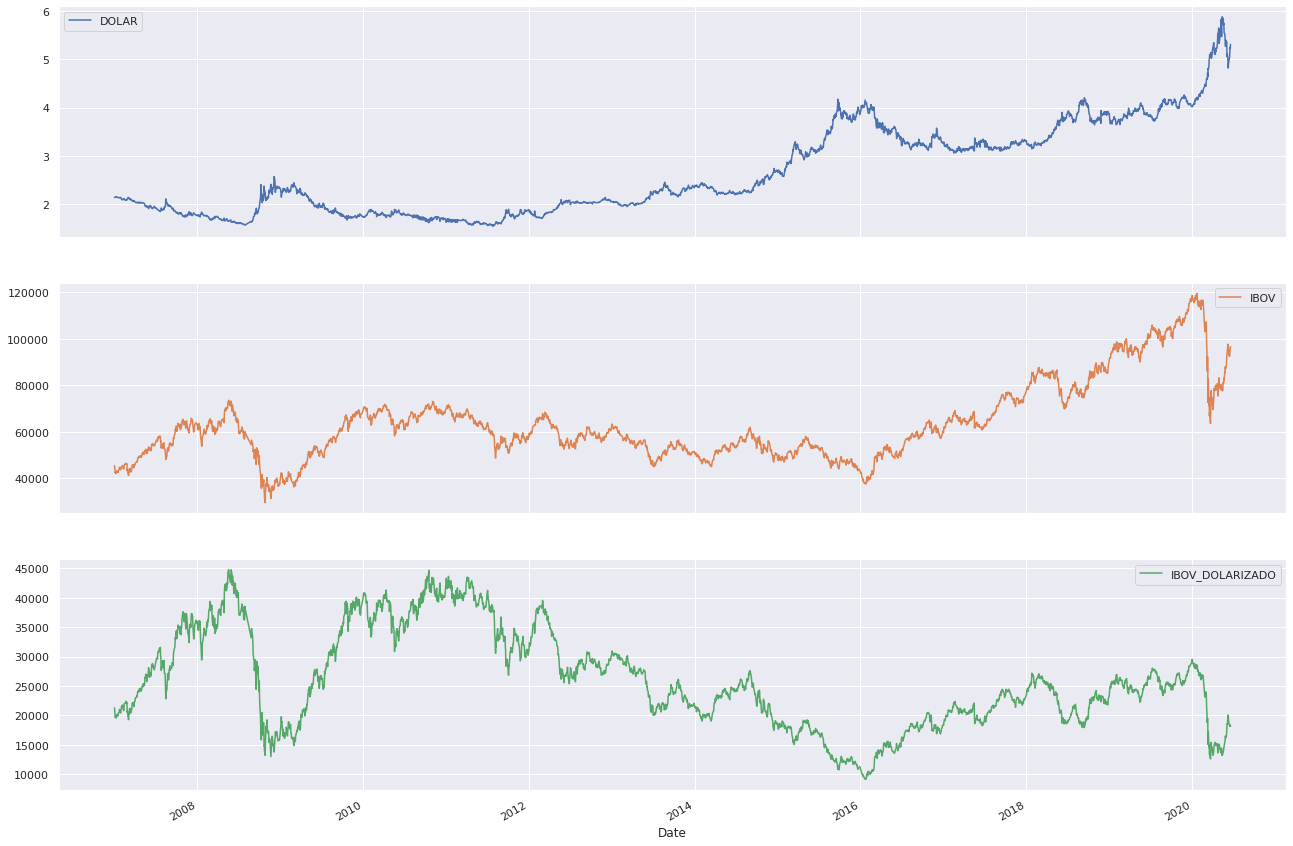

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,16))

# Backtesting com Pyfolio - Sharpe, Beta, Volatilidade, CAGR, Drawdown

In [ ]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tickers = ["ABEV3.SA","ITSA4.SA","WEGE3.SA","USIM5.SA","VALE3.SA",'^BVSP']
dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [ ]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-19,16.442520,5.204332,4.510277,17.752893,12.913312,53749.000000
2015-06-22,16.512228,5.233504,4.442380,17.202486,13.085572,53864.000000
2015-06-23,16.477373,5.233504,4.393883,17.307323,12.975300,53772.000000
2015-06-24,16.468660,5.221835,4.267789,17.298586,12.998422,53843.000000
2015-06-25,16.486090,5.134320,4.112596,16.879229,13.198950,53176.000000
...,...,...,...,...,...,...
2020-06-15,13.430000,9.560000,6.360000,53.880001,44.270000,92376.000000
2020-06-16,13.260000,9.760000,6.550000,55.389999,44.759998,93531.000000
2020-06-17,13.770000,9.930000,6.770000,56.200001,46.160000,95547.000000


In [ ]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-19,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-22,0.004239,0.005605,-0.015054,-0.031004,0.013340,0.002140
2015-06-23,-0.002111,0.000000,-0.010917,0.006094,-0.008427,-0.001708
2015-06-24,-0.000529,-0.002230,-0.028698,-0.000505,0.001782,0.001320
2015-06-25,0.001058,-0.016759,-0.036364,-0.024242,0.015427,-0.012388
...,...,...,...,...,...,...
2020-06-15,-0.010317,-0.023493,-0.007800,0.008989,0.000452,-0.004515
2020-06-16,-0.012658,0.020920,0.029874,0.028025,0.011068,0.012503
2020-06-17,0.038462,0.017418,0.033588,0.014624,0.031278,0.021554


In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-06-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-06-22,1.004239,1.005605,0.984946,0.968996,1.013340,1.002140
2015-06-23,1.002120,1.005605,0.974194,0.974902,1.004800,1.000428
2015-06-24,1.001590,1.003363,0.946237,0.974409,1.006591,1.001749
2015-06-25,1.002650,0.986547,0.911828,0.950787,1.022120,0.989339
...,...,...,...,...,...,...
2020-06-15,0.816785,1.836931,1.410113,3.034998,3.428245,1.718655
2020-06-16,0.806446,1.875361,1.452239,3.120055,3.466190,1.740144
2020-06-17,0.837463,1.908026,1.501017,3.165681,3.574606,1.777652


In [ ]:
carteira = 10000 * retorno_acumulado.iloc[:, :5] 
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-06-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-06-22,10042.394882,10056.053191,9849.461915,9689.961858,10133.397447,49771.269294,-0.004575
2015-06-23,10021.196861,10056.053191,9741.935920,9749.015566,10048.003082,49616.204620,-0.003116
2015-06-24,10015.897936,10033.630266,9462.365796,9744.093797,10065.908507,49321.896301,-0.005932
2015-06-25,10026.498106,9865.472524,9118.278595,9507.874669,10221.196434,48739.320328,-0.011812
...,...,...,...,...,...,...,...
2020-06-15,8167.847866,18369.311899,14101.130426,30349.982794,34282.452558,105270.725543,-0.003333
2020-06-16,8064.457343,18753.606744,14522.390730,31200.547422,34661.904294,107202.906532,0.018354
2020-06-17,8374.628913,19080.257820,15010.165206,31656.811848,35746.058019,109867.921805,0.024860


In [ ]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

Start date,2015-06-19
End date,2020-06-19
Total months,59
,Backtest
Annual return,17.5%
Cumulative returns,121.5%
Annual volatility,30.1%
Sharpe ratio,0.69
Calmar ratio,0.45
Stability,0.85
Max drawdown,-39.1%


AttributeError: ignored

(0.8, 1.4)

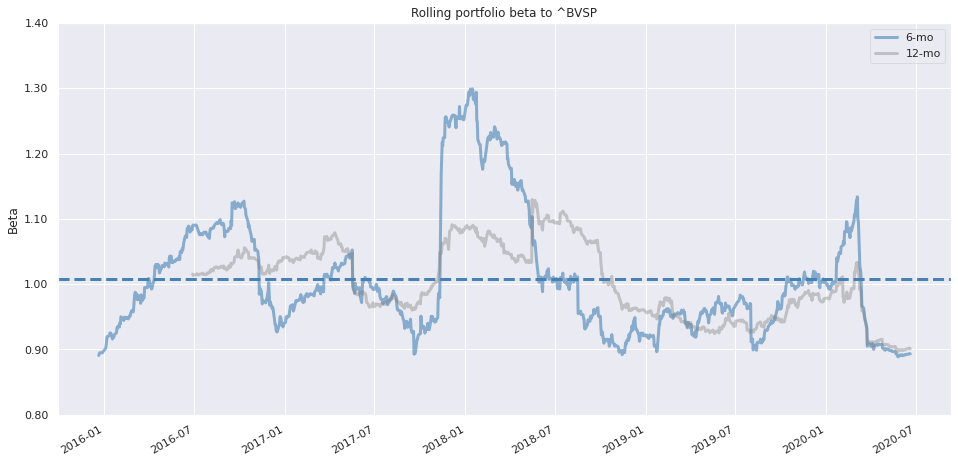

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"])
plt.ylim((0.8, 1.4))

# Simulando carteira aleatórias de ações

In [ ]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBDC3.SA BBDC4.SA PETR4.SA VALE3.SA RAIL3.SA BRAP4.SA BRKM5.SA BTOW3.SA BRFS3.SA CCRO3.SA"
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,PETR4.SA,RAIL3.SA,VALE3.SA
Date,,,,,,,,,,,,,
2019-06-19,17.734224,45.400002,36.235340,31.210390,34.268879,32.444172,28.600000,34.819191,33.754299,13.348800,26.753519,20.480000,50.949917
2019-06-21,17.977827,44.259998,38.522465,31.930481,35.041790,32.356007,28.660000,34.527409,34.149700,13.815009,27.492352,20.879999,51.086304
2019-06-24,17.831663,43.570000,38.474010,32.072590,35.321159,32.512745,28.889999,35.179050,33.507198,13.558118,27.463186,20.750000,51.047340
2019-06-25,17.704992,42.599998,36.497005,31.523058,35.023167,31.640905,28.750000,34.712204,32.419998,13.272684,26.743797,20.290001,50.053669
2019-06-26,17.636784,42.389999,35.942253,31.646231,35.460831,32.013153,28.520000,34.751106,32.410099,13.215598,26.899340,20.000000,50.248508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,13.430000,22.150000,49.509998,19.549999,21.150000,35.529999,21.200001,24.500000,101.900002,14.220000,20.700001,23.530001,53.880001
2020-06-16,13.260000,22.590000,49.500000,20.190001,22.030001,36.369999,22.100000,25.070000,100.080002,13.980000,21.370001,23.670000,55.389999
2020-06-17,13.770000,22.620001,51.200001,20.459999,22.379999,37.160000,22.490000,25.510000,106.199997,14.060000,21.440001,24.100000,56.200001


In [ ]:
  retorno = dados_yahoo.pct_change()
  retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,PETR4.SA,RAIL3.SA,VALE3.SA
Date,,,,,,,,,,,,,
2019-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-21,0.013736,-0.025110,0.063119,0.023072,0.022554,-0.002717,0.002098,-0.008380,0.011714,0.034925,0.027616,0.019531,0.002677
2019-06-24,-0.008130,-0.015590,-0.001258,0.004451,0.007972,0.004844,0.008025,0.018873,-0.018814,-0.018595,-0.001061,-0.006226,-0.000763
2019-06-25,-0.007104,-0.022263,-0.051385,-0.017134,-0.008437,-0.026815,-0.004846,-0.013271,-0.032447,-0.021053,-0.026195,-0.022169,-0.019466
2019-06-26,-0.003853,-0.004930,-0.015200,0.003907,0.012496,0.011765,-0.008000,0.001121,-0.000305,-0.004301,0.005816,-0.014293,0.003893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,-0.010317,0.001356,-0.006820,-0.017094,-0.022191,0.003672,-0.016698,-0.008097,0.024429,-0.009749,0.004854,-0.022435,0.008989
2020-06-16,-0.012658,0.019865,-0.000202,0.032737,0.041608,0.023642,0.042453,0.023265,-0.017861,-0.016878,0.032367,0.005950,0.028025
2020-06-17,0.038462,0.001328,0.034343,0.013373,0.015887,0.021721,0.017647,0.017551,0.061151,0.005723,0.003276,0.018166,0.014624


In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,PETR4.SA,RAIL3.SA,VALE3.SA
Date,,,,,,,,,,,,,
2019-06-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-06-21,1.013736,0.974890,1.063119,1.023072,1.022554,0.997283,1.002098,0.991620,1.011714,1.034925,1.027616,1.019531,1.002677
2019-06-24,1.005494,0.959692,1.061781,1.027625,1.030707,1.002114,1.010140,1.010335,0.992679,1.015681,1.026526,1.013184,1.001912
2019-06-25,0.998352,0.938326,1.007221,1.010018,1.022011,0.975242,1.005245,0.996927,0.960470,0.994298,0.999637,0.990723,0.982409
2019-06-26,0.994505,0.933700,0.991912,1.013965,1.034782,0.986715,0.997203,0.998045,0.960177,0.990021,1.005451,0.976563,0.986233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,0.757293,0.487885,1.366346,0.626394,0.617178,1.095112,0.741259,0.703635,3.018875,1.065264,0.773730,1.148926,1.057509
2020-06-16,0.747707,0.497577,1.366070,0.646900,0.642857,1.121003,0.772727,0.720005,2.964956,1.047285,0.798773,1.155762,1.087146
2020-06-17,0.776465,0.498238,1.412985,0.655551,0.653071,1.145352,0.786364,0.732642,3.146266,1.053278,0.801390,1.176758,1.103044


In [ ]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,BTOW3.SA,ABEV3.SA,RAIL3.SA,BRKM5.SA,CCRO3.SA,saldo,retorno
Date,,,,,,,
2019-06-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-06-21,10117.140930,10137.363072,10195.312318,9916.200701,10349.251934,50715.268956,0.014305
2019-06-24,9926.794264,10054.943938,10131.836164,10103.350898,10156.806728,50373.731993,-0.006734
2019-06-25,9604.701911,9983.516603,9907.227231,9969.273554,9942.979436,49407.698736,-0.019177
2019-06-26,9601.769206,9945.054986,9765.625218,9980.446209,9900.214550,49193.110170,-0.004343
...,...,...,...,...,...,...,...
2020-06-15,30188.747523,7572.927952,11489.258405,7036.349585,10652.643369,66939.926833,0.003222
2020-06-16,29649.557037,7477.068063,11557.617483,7200.052325,10472.851380,66357.146289,-0.008706
2020-06-17,31462.657966,7764.647728,11767.578574,7326.419573,10532.782520,68854.086361,0.037629


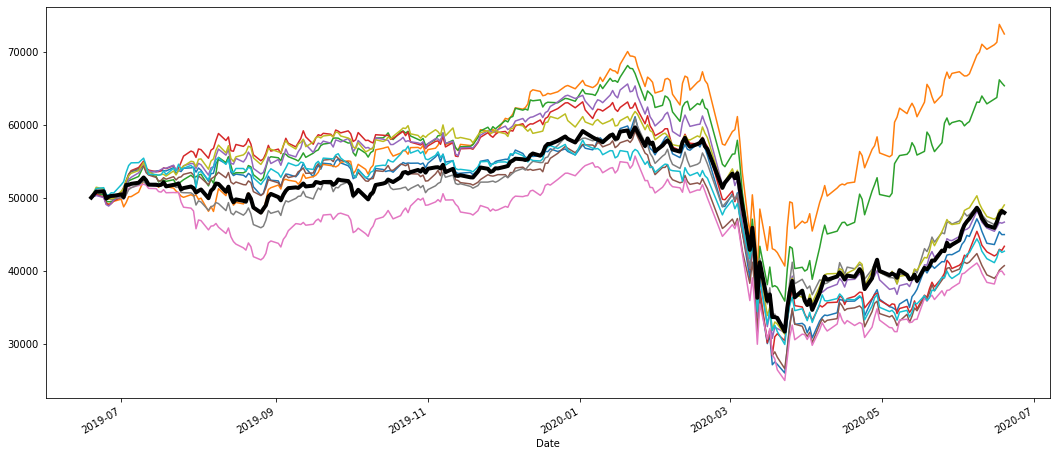

In [ ]:
for i in range(10):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')